In [1]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df= pd.read_csv(iris_data_loc, header=None, encoding='utf-8')

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler


class_labels = df[4].unique()
label_to_int = lambda x: np.where(class_labels == x)[0][0]
df['int_labels'] = df[4].apply(label_to_int)
print(df.info())
X = df.iloc[:, 0:3]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

sc_train = StandardScaler()
sc_test = StandardScaler()

sc_train.fit(X_train)
sc_test.fit(X_test)
X_train_std, X_test_std = sc_train.transform(X_train), sc_test.transform(X_test)

print(X_test.shape, X_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           150 non-null    float64
 1   1           150 non-null    float64
 2   2           150 non-null    float64
 3   3           150 non-null    float64
 4   4           150 non-null    object 
 5   int_labels  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(30, 3) (120, 3)


In [5]:
svm_sklearn = SVC(kernel='linear', C=1.0, random_state=42)
svm_sklearn.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

In [6]:
import os

original_dir = os.getcwd()
os.chdir('..')

from decision_plotting import DecisionRegionPlotter
os.chdir(original_dir)

In [7]:
drp = DecisionRegionPlotter()

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Training Results from SVM'}, xlabel='Feature 0', ylabel='Feature 2'>)

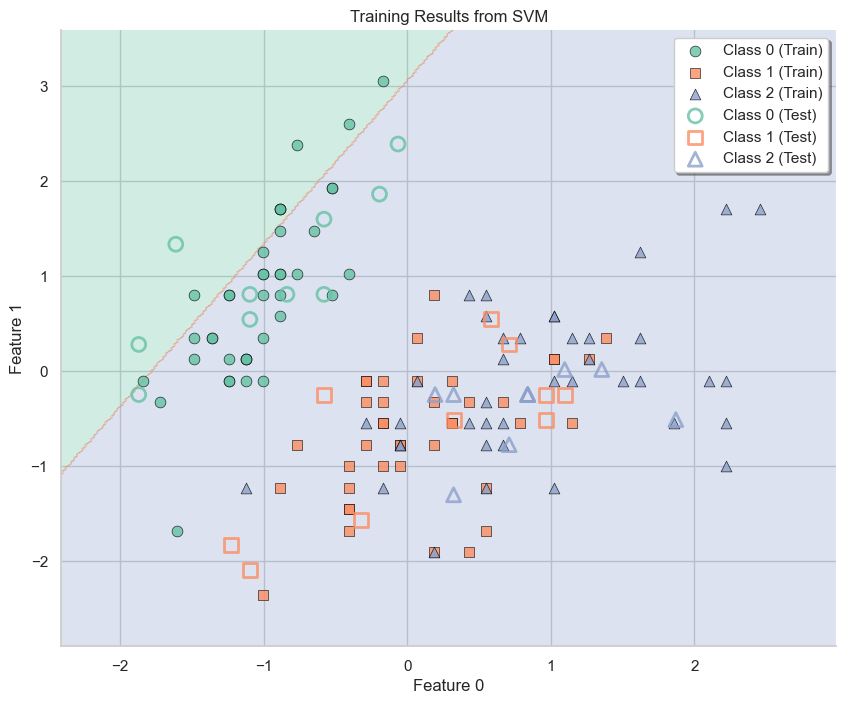

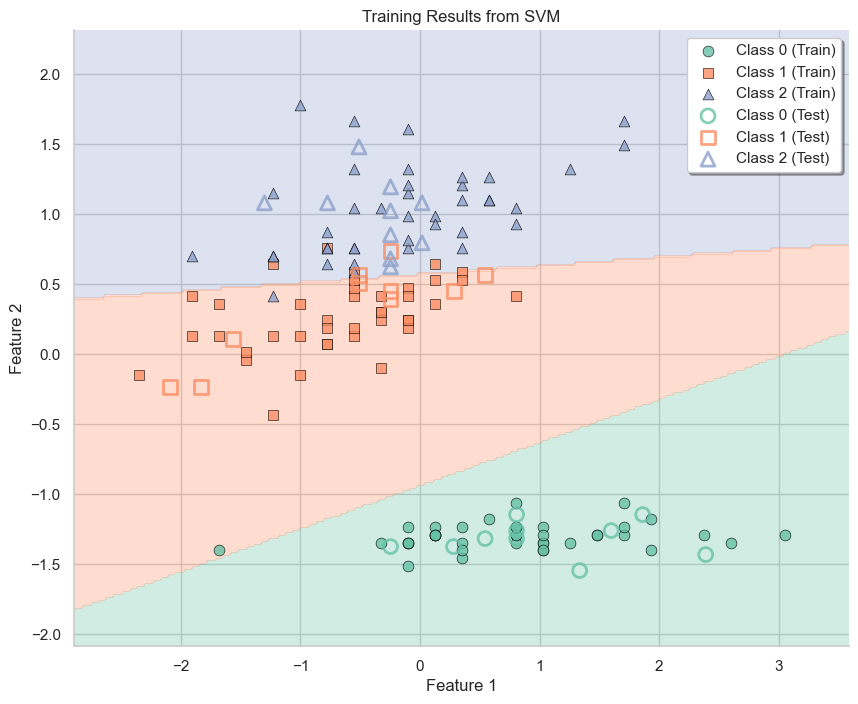

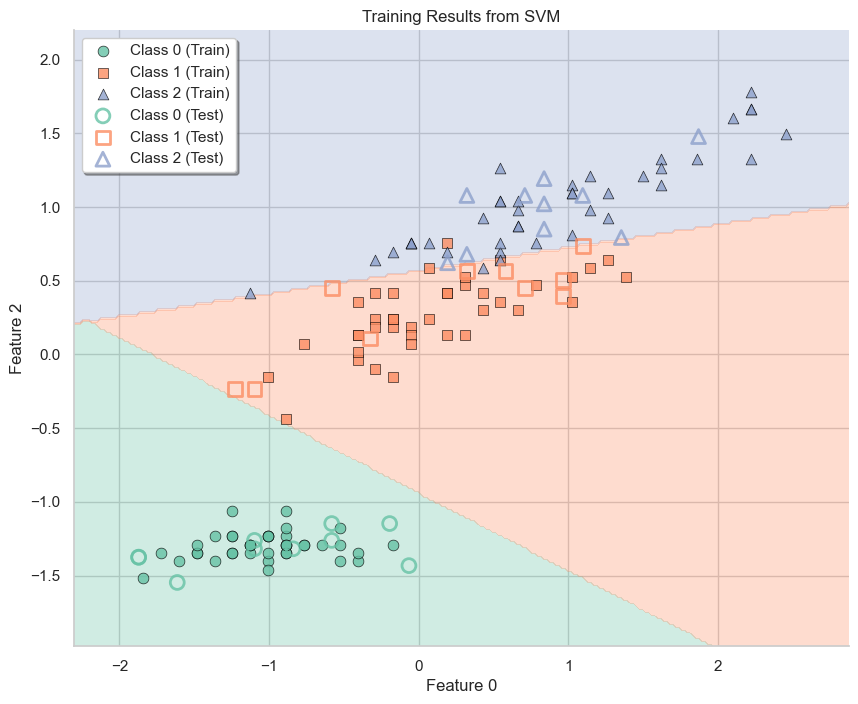

In [8]:
drp.plot_decision_regions(X_train=X_train_std, y_train=y_train, X_test=X_test_std, y_test=y_test, classifier=svm_sklearn, title="Training Results from SVM")
drp.plot_decision_regions(X_train=X_train_std, y_train=y_train, X_test=X_test_std, y_test=y_test, classifier=svm_sklearn, title="Training Results from SVM", feature_indices=(1,2))
drp.plot_decision_regions(X_train=X_train_std, y_train=y_train, X_test=X_test_std, y_test=y_test, classifier=svm_sklearn, title="Training Results from SVM", feature_indices=(0,2))